## Config

In [1]:
import json
import pandas as pd
import os

In [2]:
# Load the config file
with open('../config/config.json', 'r') as f:
    config = json.load(f)

file_path = config["data_loc"]
file_name = "QTL_text.json"
final_path = os.path.join(file_path, file_name) 

## Import Dataset

In [3]:
# Load json file
df = pd.read_json(final_path)
print(f"Shape of the original dataset: {df.shape}", "\n")

df.head()

Shape of the original dataset: (11278, 5) 



PMID                                            Journal  \
0  17179536                  J Anim Sci. 2007 Jan;85(1):22-30.   
1  17177700         J Anim Breed Genet. 2006 Dec;123(6):414-8.   
2  17129674  Vet Parasitol. 2007 Apr 10;145(1-2):2-10. Epub...   
3  17121599                 Anim Genet. 2006 Dec;37(6):543-53.   
4  17057239  Genetics. 2006 Dec;174(4):2119-27. Epub 2006 O...   

                                               Title  \
0  Variance component analysis of quantitative tr...   
1  Single nucleotide polymorphism identification,...   
2  Genetic resistance to Sarcocystis miescheriana...   
3  Results of a whole-genome quantitative trait l...   
4  Unexpected high polymorphism at the FABP4 gene...   

                                            Abstract  Category  
0  In a previous study, QTL for carcass compositi...         1  
1  Pituitary adenylate cyclase-activating polypep...         0  
2  Clinical and parasitological traits of Sarcocy...         0  
3  A whole-genome quantitative trait locus (QTL) ...         1  
4  Fatty acid bing protein 4 (FABP4) plays a key ...         0

## Pre-processing and other requirements

In [4]:
# "In this project, you will need to use "Abstract" and "Category", and you can ignore the other fields."
df_processed = df[['Abstract', 'Category']]
print(f"Shape before filtering: {df_processed.shape}", "\n")

# "In this project, you need to ignore papers in Category ‘0’."
df_processed = df_processed[df_processed['Category'] == 1]
print(f"Shape after filtering: {df_processed.shape}", "\n")

df_processed.head()

Shape before filtering: (11278, 2) 

Shape after filtering: (1007, 2) 



Abstract  Category
0   In a previous study, QTL for carcass compositi...         1
3   A whole-genome quantitative trait locus (QTL) ...         1
5   A partial genome scan using microsatellite mar...         1
7   BACKGROUND: The rate of pubertal development a...         1
10  Previously, quantitative trait loci (QTL) for ...         1

### Tokenization of Sentences

In [5]:
import spacy
nlp_spacy = spacy.load("en_core_web_sm")

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /Users/gabrielvictorgomesferr
[nltk_data]     eira/opt/anaconda3/envs/nlp_env/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/gabrielvictorgomes
[nltk_data]     ferreira/opt/anaconda3/envs/nlp_env/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Set stop words
stop_words = set(stopwords.words('english'))

# Set lemmatizer
lemmatizer = WordNetLemmatizer()

# Using split
df_processed['abstract_split'] = df_processed['Abstract'].apply(lambda token: [lemmatizer.lemmatize(token.lower()) for token in token.split() if token.isalpha() and len(token)>2 and token not in stop_words])

# Using spacy
df_processed['abstract_spacy'] = df_processed['Abstract'].apply(lambda token: [lemmatizer.lemmatize(token.text.lower()) for token in nlp_spacy(token) if token.text.isalpha() and len(token) > 2 and not token.is_stop])

# Using nltk
df_processed['abstract_nltk'] = df_processed['Abstract'].apply(lambda token: [lemmatizer.lemmatize(token.lower()) for token in word_tokenize(token) if token.isalpha() and len(token)> 2 and token not in stop_words])

df_processed.head()

# https://medium.com/@lingostat/tf-idf-for-text-preprocessing-in-machine-learning-a66b29774040

Abstract  Category  \
0   In a previous study, QTL for carcass compositi...         1   
3   A whole-genome quantitative trait locus (QTL) ...         1   
5   A partial genome scan using microsatellite mar...         1   
7   BACKGROUND: The rate of pubertal development a...         1   
10  Previously, quantitative trait loci (QTL) for ...         1   

                                       abstract_split  \
0   [previous, qtl, carcass, composition, meat, qu...   
3   [quantitative, trait, locus, scan, phenotype, ...   
5   [partial, genome, scan, using, microsatellite,...   
7   [the, rate, pubertal, development, weaning, es...   
10  [quantitative, trait, locus, backfat, loin, ey...   

                                       abstract_spacy  \
0   [previous, study, qtl, carcass, composition, m...   
3   [genome, quantitative, trait, locus, qtl, scan...   
5   [partial, genome, scan, microsatellite, marker...   
7   [background, rate, pubertal, development, wean...   
10  [previously, quantitative, trait, locus, qtl, ...   

                                        abstract_nltk  
0   [previous, study, qtl, carcass, composition, m...  
3   [quantitative, trait, locus, qtl, scan, phenot...  
5   [partial, genome, scan, using, microsatellite,...  
7   [background, the, rate, pubertal, development,...  
10  [previously, quantitative, trait, locus, qtl, ...

## Task 1
Use wordcloud to visualize words in this corpus. The figure should be 800*800, with white background color. You will need to generate two word cloud images: 1) use word frequency, and 2) use tf-idf 
You may find the following libraries useful for this task: WordCloud


### 1) Frequency Base

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

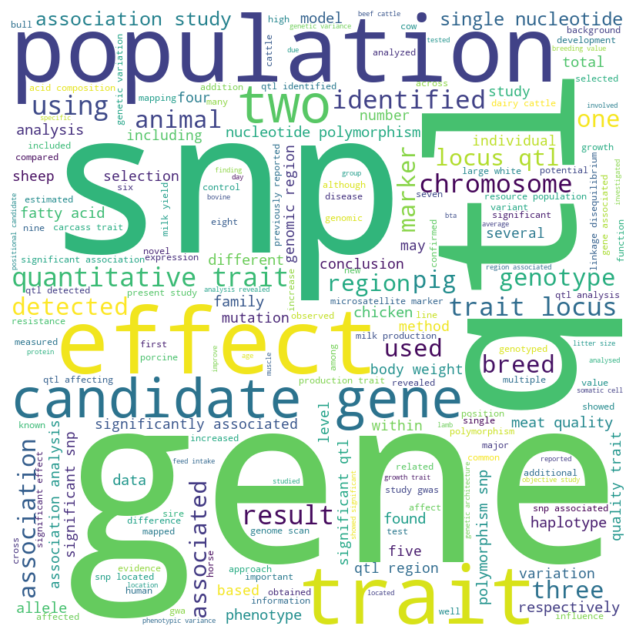

In [8]:
# Define input text
input_text = " ".join([" ".join(words) for words in df_processed['abstract_nltk']])

# Define word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(input_text)

# Display
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2) TD-IDF Base

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [10]:
# df_processed['abstract_nltk'].apply(lambda token: " ".join(token))

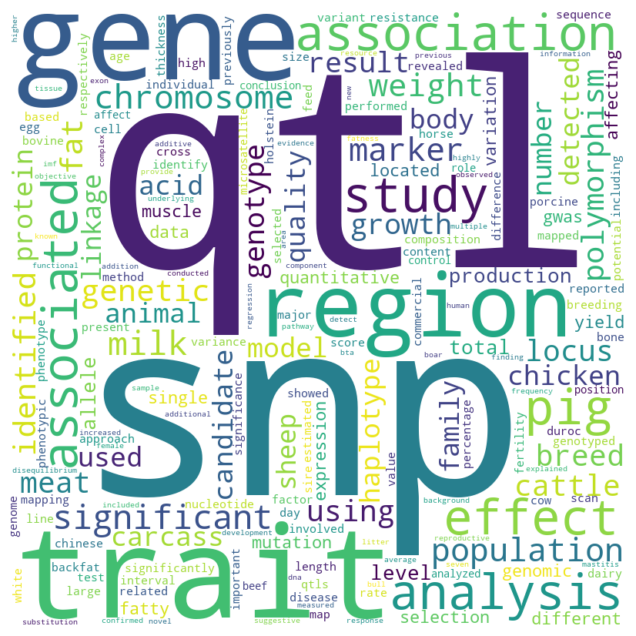

In [11]:
# https://medium.com/@lingostat/tf-idf-for-text-preprocessing-in-machine-learning-a66b29774040

# Compute TF-IDF
tfidf_vec = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vec.fit_transform(df_processed['abstract_nltk'].apply(lambda token: " ".join(token)))
tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
tfidf_word = dict(zip(tfidf_vec.get_feature_names_out(), tfidf_scores))

# Define word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(tfidf_word)

# Display
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# top_words

In [13]:
# Sort and print highest ranked words
top_words = sorted(tfidf_word.items(), key=lambda x: x[1], reverse=True)[:10]
top_words_list, top_scores_list = zip(*top_words)
for word, score in top_words:
    print(f"{word}: {round(score, 4)}")

qtl: 0.0707
snp: 0.0545
trait: 0.0534
gene: 0.0474
region: 0.0329
association: 0.0309
associated: 0.0299
study: 0.0295
pig: 0.0295
analysis: 0.0293


## Task 2 

Train a Word2Vec model on this corpus, with the following parameters
vector_size=100, window=5, min_count=10
For each of the top 10 tf-idf words, print the 20 most similar words.

In [14]:
import gensim

In [15]:
# Document body
abstract_nltk = df_processed['abstract_nltk']

# Define model Word2Vec model
word2vec_model = gensim.models.Word2Vec(
    vector_size=100,
    window=5,
    min_count=10)

# Build Vocabulary
word2vec_model.build_vocab(abstract_nltk)

# Train model
word2vec_model.train(abstract_nltk, total_examples=word2vec_model.corpus_count, epochs=word2vec_model.epochs)

## https://www.youtube.com/watch?v=Q2NtCcqmIww

(501085, 681935)

In [16]:
# Dictionary to save values
most_similar_dict = {}

# Print and collect vales
for word in top_words:
    similar_words = word2vec_model.wv.most_similar(word[0], topn=20)
    print(f"{word[0]} → {', '.join([w[0] for w in similar_words])}")

    most_similar_dict[word[0]] = [(str(w[0]) + ":" + str(round(w[1], 4))) for w in similar_words]

# Create data-frame
df_test = pd.DataFrame.from_dict(most_similar_dict, orient='index')
df_test.index = range(1, len(df_test) + 1)
df_test.columns = [f"Similar {i+1}" for i in range(df_test.shape[1])]
df_test.insert(0, "Top Word", top_words_list)
df_test.insert(1, "TF-IDF Score", [round(score, 4) for score in top_scores_list])

df_test

qtl → qtls, previously, mapped, detected, chromosome, reported, suggestive, locus, identified, one, several, significant, quantitative, chromosomal, putative, region, located, coincided, pleiotropic, near
snp → revealed, exon, intron, single, haplotype, three, four, two, five, polymorphism, within, nucleotide, showed, seven, flanking, the, six, one, association, sequence
trait → affecting, locus, quantitative, fatness, quality, growth, carcass, meat, fertility, endocrine, qtls, influencing, related, reported, economically, eggshell, bone, affect, complex, detect
gene → candidate, positional, mutation, functional, region, potential, pathway, involved, several, bovine, variant, porcine, novel, scd, promoter, close, causal, located, coding, causative
region → located, identified, previously, within, novel, several, chromosome, reported, one, positional, mutation, close, detected, bovine, candidate, variant, near, chromosomal, position, mapped
association → analysis, gwas, sequence, reveal

Top Word  TF-IDF Score            Similar 1             Similar 2  \
1           qtl        0.0707           qtls:0.968     previously:0.9493   
2           snp        0.0545      revealed:0.9347           exon:0.9332   
3         trait        0.0534     affecting:0.9246          locus:0.9047   
4          gene        0.0474     candidate:0.9688     positional:0.9439   
5        region        0.0329       located:0.9698     identified:0.9634   
6   association        0.0309       analysis:0.912            gwas:0.899   
7    associated        0.0299         found:0.9148  significantly:0.8994   
8         study        0.0295      identify:0.9628      objective:0.9382   
9           pig        0.0295    commercial:0.9348       landrace:0.9312   
10     analysis        0.0293  disequilibrium:0.96        linkage:0.9518   

              Similar 3          Similar 4          Similar 5  \
1         mapped:0.9269    detected:0.9258  chromosome:0.9226   
2         intron:0.9234      single:0.9177   haplotype:0.9152   
3   quantitative:0.8975     fatness:0.8815     quality:0.8315   
4        mutation:0.862  functional:0.8604      region:0.8417   
5     previously:0.9336      within:0.9307       novel:0.9275   
6       sequence:0.8936    revealed:0.8869       array:0.8814   
7           also:0.8918     several:0.8763         bta:0.8618   
8            aim:0.9268      present:0.919     genomic:0.9177   
9      erhualian:0.9307        duroc:0.929     leghorn:0.9279   
10     regression:0.947      marker:0.9397    interval:0.9368   

           Similar 6          Similar 7         Similar 8  ...  \
1    reported:0.9147   suggestive:0.908      locus:0.8943  ...   
2       three:0.9126        four:0.9065        two:0.9048  ...   
3      growth:0.8214     carcass:0.8205       meat:0.8113  ...   
4   potential:0.8333     pathway:0.8237   involved:0.8194  ...   
5      several:0.926  chromosome:0.9174   reported:0.9101  ...   
6      approach:0.88     imputed:0.8762       chip:0.8719  ...   
7    reported:0.8529       close:0.8396    located:0.8383  ...   
8        gwas:0.8816       detect:0.872  conducted:0.8647  ...   
9    dongxiang:0.925     meishan:0.9221       cross:0.921  ...   
10    mapping:0.9339    approach:0.9303       ldla:0.9241  ...   

          Similar 11          Similar 12           Similar 13  \
1     several:0.8674  significant:0.8543  quantitative:0.8498   
2      within:0.8855   nucleotide:0.8828        showed:0.8788   
3        qtls:0.7957  influencing:0.7919        related:0.789   
4     variant:0.8022      porcine:0.7977         novel:0.7939   
5    mutation:0.8963         close:0.896      detected:0.8896   
6   conducted:0.8614       single:0.8608           gwa:0.8595   
7        qtls:0.8344   chromosome:0.8175          near:0.8174   
8          map:0.858         fine:0.8499       mapping:0.8416   
9     broiler:0.9131         rock:0.9117    intercross:0.9104   
10   combined:0.9101         test:0.9061        method:0.9016   

            Similar 14          Similar 15       Similar 16  \
1   chromosomal:0.8359     putative:0.8277    region:0.8272   
2         seven:0.8726     flanking:0.8676       the:0.8664   
3       reported:0.768  economically:0.767  eggshell:0.7657   
4           scd:0.7876      promoter:0.787     close:0.7765   
5        bovine:0.8796    candidate:0.8744   variant:0.8673   
6    regression:0.8558     interval:0.8554       snp:0.8537   
7     harboring:0.8172      promoter:0.814      level:0.813   
8        genome:0.8409         scan:0.8346  approach:0.8331   
9          boar:0.9089        sheep:0.9074    litter:0.9043   
10       across:0.8976     revealed:0.8973        gwa:0.897   

           Similar 17              Similar 18          Similar 19  \
1      located:0.8233        coincided:0.8222  pleiotropic:0.8206   
2          six:0.8612              one:0.8583  association:0.8537   
3         bone:0.7648           affect:0.7629      complex:0.7616   
4       causal:0.7737          located:0.

## Task 3
Extract phrases and repeat task 1 and 2. You can be creative in phrase extraction. 


In [17]:
from gensim.models.phrases import Phraser, Phrases

In [18]:
# https://tedboy.github.io/nlps/generated/generated/gensim.models.Phrases.html

# Document Body
abstract_tokenized = df_processed['abstract_nltk']

#### Built-in TfidfVectorizer Bigram and Trigram

In [88]:
# Compute TF-IDF
tfidf_vec = TfidfVectorizer(ngram_range=(2, 3), stop_words='english')
tfidf_matrix = tfidf_vec.fit_transform(abstract_tokenized.apply(lambda token: " ".join(token)))

tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
tfidf_word = dict(zip(tfidf_vec.get_feature_names_out(), tfidf_scores))

# Sort highest ranked words
top_words = sorted(tfidf_word.items(), key=lambda x: x[1], reverse=True)[:10]
top_words_list, top_scores_list = zip(*top_words)

for word, score in top_words:
    print(f"{word}: {round(score, 4)}")

genome wide: 0.0092
candidate gene: 0.0082
fatty acid: 0.0074
quantitative trait: 0.0072
trait locus: 0.0068
quantitative trait locus: 0.0068
meat quality: 0.0065
single nucleotide: 0.0059
nucleotide polymorphism: 0.0058
single nucleotide polymorphism: 0.0058


In [94]:
# Get the list of bigrams and trigrams
ngrams = tfidf_vec.get_feature_names_out()
ngrams = set(ngrams)
print(f"Number of good phrases in the trait dictionary: {len(ngrams)}")
print(ngrams)

Number of good phrases in the trait dictionary: 211432
{'direction result', 'ca identified intron', 'center trait', 'revealed qtl population', '1990s causal', 'polymorphism 12', 'underlying gene causal', 'used select', 'holstein family different', 'precision genome quantitative', 'animal model proc', 'confirming importance controlling', 'efficiency human', 'pcr rflp technology', 'array substantial heritability', 'frzb col5a2 igf1', 'information regarding', 'texel sired', 'percentage family increase', 'figf strongly associated', 'dorset sheep individual', 'variant breed', 'snp60 chip microarray', 'gga13 gga24', 'increased fitness', 'model allowing', 'thickness lean cut', 'dc study', 'australia underwent', 'haplotype hypothetical ibd', 'identical descent analysis', 'elf3 dbh cdk5', 'locus affected early', 'rdw study', 'reconstruction based sscrofa10', 'dominance deviation effect', 'range size used', 'sweep locus', 'case obtained', '300 lamb genotyped', 'height snp', 'cc aa', '10 rfi', 'e

#### Gensim Bigram and Trigram

In [50]:
# Bigram and trigram
bigram = Phraser(Phrases(abstract_tokenized, min_count=2, threshold=15))
trigram = Phraser(Phrases(bigram[abstract_tokenized], min_count=2, threshold=15))
bigram_token = [bigram[doc] for doc in abstract_tokenized]
trigram_token = [trigram[bigram[doc]] for doc in abstract_tokenized]
bigram_text = [" ".join(token) for token in bigram_token]
trigram_text = [" ".join(token) for token in trigram_token]
print(bigram_token[0])
print(bigram_text)

['previous_study', 'qtl', 'carcass_composition', 'meat_quality', 'identified', 'commercial', 'finisher', 'cross', 'the', 'main_objective', 'current_study', 'confirm', 'fine_map', 'qtl', 'genotyping', 'increased', 'number', 'individual', 'marker', 'analyze_data', 'using', 'combined_linkage', 'linkage_disequilibrium', 'analysis', 'method', 'modified', 'version', 'method', 'excludes', 'linkage_disequilibrium', 'information', 'analysis', 'enabling', 'comparison', 'result', 'based', 'linkage', 'information', 'result', 'based', 'combined_linkage', 'linkage_disequilibrium', 'information', 'nine', 'additional', 'paternal_family', 'genotyped', 'marker', 'resulting', 'total', 'animal', 'genotyped', 'marker', 'respectively', 'the', 'qtl', 'affecting', 'meat_color', 'confirmed', 'whereas', 'qtl', 'affecting', 'weight', 'could_confirmed', 'the', 'combined_linkage', 'linkage_disequilibrium', 'analysis', 'resulted', 'identification', 'new', 'significant', 'effect', 'trait', 'chromosome', 'heritabilit

In [51]:
# Compute TF-IDF
tfidf_vec = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tfidf_matrix = tfidf_vec.fit_transform(trigram_text)

tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
tfidf_word = dict(zip(tfidf_vec.get_feature_names_out(), tfidf_scores))

# Sort highest ranked words
top_words = sorted(tfidf_word.items(), key=lambda x: x[1], reverse=True)[:10]
top_words_list, top_scores_list = zip(*top_words)

for word, score in top_words:
    print(f"{word}: {round(score, 4)}")

qtl: 0.069
snp: 0.056
trait: 0.0492
gene: 0.0401
association: 0.0299
significant: 0.0283
region: 0.0278
chromosome: 0.0268
associated: 0.0265
effect: 0.0252


#### Main result: 
- 3.	How many phrases you extracted can be found in the trait dictionary (by exact string matching)? 

In [83]:
file_name = "Trait dictionary.txt"
final_path = os.path.join(file_path, file_name) 

# Read trait dictionary file
with open(final_path, "r", encoding="utf-8") as file:
    trait_phrases = set([phrase.lower().strip() for phrase in file if phrase.strip()])

print(f"Number of good phrases in the trait dictionary: {len(trait_phrases)}")
print(trait_phrases)

Number of good phrases in the trait dictionary: 22719
{'splenocyte apoptosis trait', 'female reproductive system morphology', 'total milk casein amount', 'number of mature b cells', 'sciatic nerve morphology', 'somite development', 'milk fatty acid c18:3 n-3', 'serum chloride level', 'percentage of study population developing trigeminal nerve malignant peripheral nerve sheath tumors during a period of time', 'gizzard morphology', 'placenta labyrinth', 'the weight of both kidneys', 'ratio of the count of pancreatic islets with peripheral duct and vessel inflammatory infiltrate only to total pancreatic islet count', 'wrisberg ganglia morphology', 'small intestine', 'primitive streak formation', 'circular sinus morphology', 'facial nerve', 'serum level of immunoglobulin', 'liver sterol', 'milk nitrogen concentration', 'tibial area', 'bone morphological', 'urine catecholamine level', 'area of individual liver tumorous lesion', 'erythroblast count', 'kidney pyramid morphology', 'blood angio

In [84]:
bi_unique = set()
bi_good_phrases = [[token for token in doc if "_" in token] for doc in bigram_token]
bi_good_phrases = [[token.replace("_", " ") for token in doc] for doc in bi_good_phrases]

for doc in bi_good_phrases:
    bi_unique.update(doc) 

print(f"Number of good phrases in the trait dictionary: {len(bi_unique)}")
print(bi_unique)

Number of good phrases in the trait dictionary: 2910
{'af bm', 'novel promising', 'substitution effect', 'white leghorn', 'c.1574a >', 'used select', 'foreshank weight', 'our finding', 'a. pleuropneumoniae', 'two-qtl model', 'promoter activity', '± 0.03', '20 cm', 'fat moisture', 'c.205g >', 'plasminogen activator', 'predictive ability', 'landrace backcross', 'bw70 bwg', 'c. *', 'epistatic pair', 'antibody level', 'bovine tuberculosis', 'stearic acid', 'qingyu pig', 'increase power', 'ankyrin 1', 'to date', 'r =', 'known function', 'curve parameter', 'lumbar bft', 'sexual precocity', 'minolta b', 'h2 =', 'small intestine', 'block defined', 'detection power', 'bacterial load', 'haplotype constructed', 'milk urea', 'economically relevant', 'farm animal', 'producer-recorded health', 'in summary', 'nominally associated', 'italian brown', 'behavioral phenotype', 'efficiency economically', 'holstein-friesian cow', 'bull b', 'lipid metabolism', 'lep g.1387c', 'chromosome 6', 'improve understa

In [85]:

matching_phrases = bi_unique & trait_phrases

# Count total matches
match_count = len(matching_phrases)


print(f"Total Exact Matches: {match_count}")
print(f"This represents {round(match_count/len(trait_phrases),4)*100}% out of all phrases in the dictionary.")
print("Matching Phrases:", matching_phrases)

Total Exact Matches: 118
This represents 0.52% out of all phrases in the dictionary.
Matching Phrases: {'semen volume', 'milk protein', 'number stillborn', 'body length', 'blood cell', 'glycolytic potential', 'ear size', 'hemoglobin concentration', 'bone density', 'lumbar vertebra', 'functional teat', 'carcass length', 'linoleic acid', 'thoracic vertebra', 'wound healing', 'ovulation rate', 'litter size', 'milk yield', 'comb mass', 'stearic acid', 'immune system', 'backfat thickness', 'mammary gland', 'small intestine', 'horn length', 'longissimus dorsi', 'immune response', 'body size', 'milk urea', 'ige level', 'feather pecking', 'sperm motility', 'chest girth', 'serum leptin', 'fatty acid', 'feed conversion', 'fat thickness', 'lipid metabolism', 'nervous system', 'oleic acid', 'meat ph', 'ham weight', 'heart weight', 'feeding behavior', 'maternal behavior', 'male fertility', 'longissimus muscle', 'eye muscle', 'shank length', 'gizzard weight', 'heart girth', 'pregnancy rate', 'chest 

In [86]:
file_name = "QTL_text.json"
final_path = os.path.join(file_path, file_name) 
df = pd.read_json(final_path)
df_processed = df[['Abstract', 'Category']]
df_processed = df_processed[df_processed['Category'] == 1]
df_processed['abstract_nltk'] = df_processed['Abstract'].apply(lambda token: [lemmatizer.lemmatize(token.lower()) for token in word_tokenize(token) if token not in stop_words])
abstract_tokenized = df_processed['abstract_nltk']
bigram = Phraser(Phrases(abstract_tokenized, min_count=2, threshold=15))
trigram = Phraser(Phrases(bigram[abstract_tokenized], min_count=2, threshold=15))
bigram_token = [bigram[doc] for doc in abstract_tokenized]
trigram_token = [trigram[bigram[doc]] for doc in abstract_tokenized]
bigram_text = [" ".join(token) for token in bigram_token]
trigram_text = [" ".join(token) for token in trigram_token]


bi_unique = set()
bi_good_phrases = [[token for token in doc if "_" in token] for doc in trigram_token]
bi_good_phrases = [[token.replace("_", " ") for token in doc] for doc in bi_good_phrases]

for doc in bi_good_phrases:
    bi_unique.update(doc) 

print(f"Number of good phrases in the trait dictionary: {len(bi_unique)}")
print(bi_unique)

Number of good phrases in the trait dictionary: 3964
{'af bm', 'novel promising', 'shear force ,', 'substitution effect', 'white leghorn', 'longissimus dorsi muscle', 'three month', 'used select', 'interesting result', 'foreshank weight', 'our finding', 'illumina porcinesnp60 beadchip', 'a. pleuropneumoniae', 'two-qtl model', 'g ]', 'promoter activity', '± 0.03', '20 cm', 'fat moisture', 'c.205g >', 'plasminogen activator', 'predictive ability', 'landrace backcross', 'bw70 bwg', 'c. *', 'epistatic pair', 'antibody level', 'bovine tuberculosis', 'stearic acid', 'qingyu pig', 'increase power', 'ankyrin 1', 'to date', '22 cm', 'r =', 'known function', 'curve parameter', 'lumbar bft', 'putative qtl', 'sexual precocity', 'minolta b', 'h2 =', 'small intestine', 'block defined', 'detection power', 'mean corpuscular volume', 'bacterial load', 'sire genotyped', 'haplotype constructed', 'lean meat yield', 'milk urea', 'economically relevant', 'farm animal', 'feed consumption feeding behavior', '

In [87]:

matching_phrases = bi_unique & trait_phrases

# Count total matches
match_count = len(matching_phrases)


print(f"Total Exact Matches: {match_count}")
print(f"This represents {round(match_count/len(trait_phrases),4)*100}% out of all phrases in the dictionary.")
print("Matching Phrases:", matching_phrases)

Total Exact Matches: 157
This represents 0.69% out of all phrases in the dictionary.
Matching Phrases: {'semen volume', 'liver weight', 'longissimus dorsi muscle', 'milk protein', 'number stillborn', 'body length', 'body weight gain', 'glycolytic potential', 'ear size', 'bone mineral density', 'bone density', 'lumbar vertebra', 'functional teat', 'total number born', 'carcass length', 'linoleic acid', 'innate immune response', 'thoracic vertebra', 'wound healing', 'ovulation rate', 'tenderness score', 'litter size', 'abdominal fat weight', 'milk yield', 'comb mass', 'stearic acid', 'immune system', 'backfat thickness', 'mammary gland', 'small intestine', 'subcutaneous fat thickness', 'mean corpuscular volume', 'horn length', 'longissimus dorsi', 'immune response', 'body size', 'rib eye area', 'milk urea', 'ige level', 'feather pecking', 'mean corpuscular hemoglobin concentration', 'testis weight', 'sperm motility', 'chest girth', 'fatty acid', 'egg size', 'milk fatty acid', 'egg number